# Next Day Temperature Prediction (Regression)#

Aim in this project is to predict the next day's minimum and maximum temperature using the given features.

You'll use the <a href="https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast">Bias correction of numerical prediction model temperature forecast Data Set</a> from the UCI Machine Learning Repository.

There are 7750 instances and 25 attributes. Last two of them are target variables which you are expected to regress successfully. But the first 23 attributes are not all useful as features, for instance date and station number.
Other features as well may or may not prove to be useful, which you can discover with data analysis and automatic feature elimination as we have seen in the lecture.

You can download the dataset as follows:

In [1]:
# Importing the pandas library for data manipulation
import pandas as pd

# Setting the URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv"

# Loading the dataset from the URL into a DataFrame
df = pd.read_csv(url)

First, you need to understand and preprocess the data. You need to handle if there is any missing data. Then, you will apply machine learning models and compare them with proper metrics.

There are no specific instructions about which models you are going to use. You are expected to try several methods we have seen in the lectures (not only Linear Regression but also Support Vector Reg., Regression Trees etc.) and compare them. You are also expected to apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc.

In [2]:
# Displaying the top 5 rows
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
# Displaying basic information and summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


# **Data Cleaning and Preprocessing**

In [4]:
# Dropping the 'station' and 'Date' columns as they are not important features for our analysis
df = df.drop(['station', 'Date'], axis=1)

# Displaying the DataFrame information to confirm the drop and check the structure of the remaining data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7682 non-null   float64
 1   Present_Tmin      7682 non-null   float64
 2   LDAPS_RHmin       7677 non-null   float64
 3   LDAPS_RHmax       7677 non-null   float64
 4   LDAPS_Tmax_lapse  7677 non-null   float64
 5   LDAPS_Tmin_lapse  7677 non-null   float64
 6   LDAPS_WS          7677 non-null   float64
 7   LDAPS_LH          7677 non-null   float64
 8   LDAPS_CC1         7677 non-null   float64
 9   LDAPS_CC2         7677 non-null   float64
 10  LDAPS_CC3         7677 non-null   float64
 11  LDAPS_CC4         7677 non-null   float64
 12  LDAPS_PPT1        7677 non-null   float64
 13  LDAPS_PPT2        7677 non-null   float64
 14  LDAPS_PPT3        7677 non-null   float64
 15  LDAPS_PPT4        7677 non-null   float64
 16  lat               7752 non-null   float64


<Axes: >

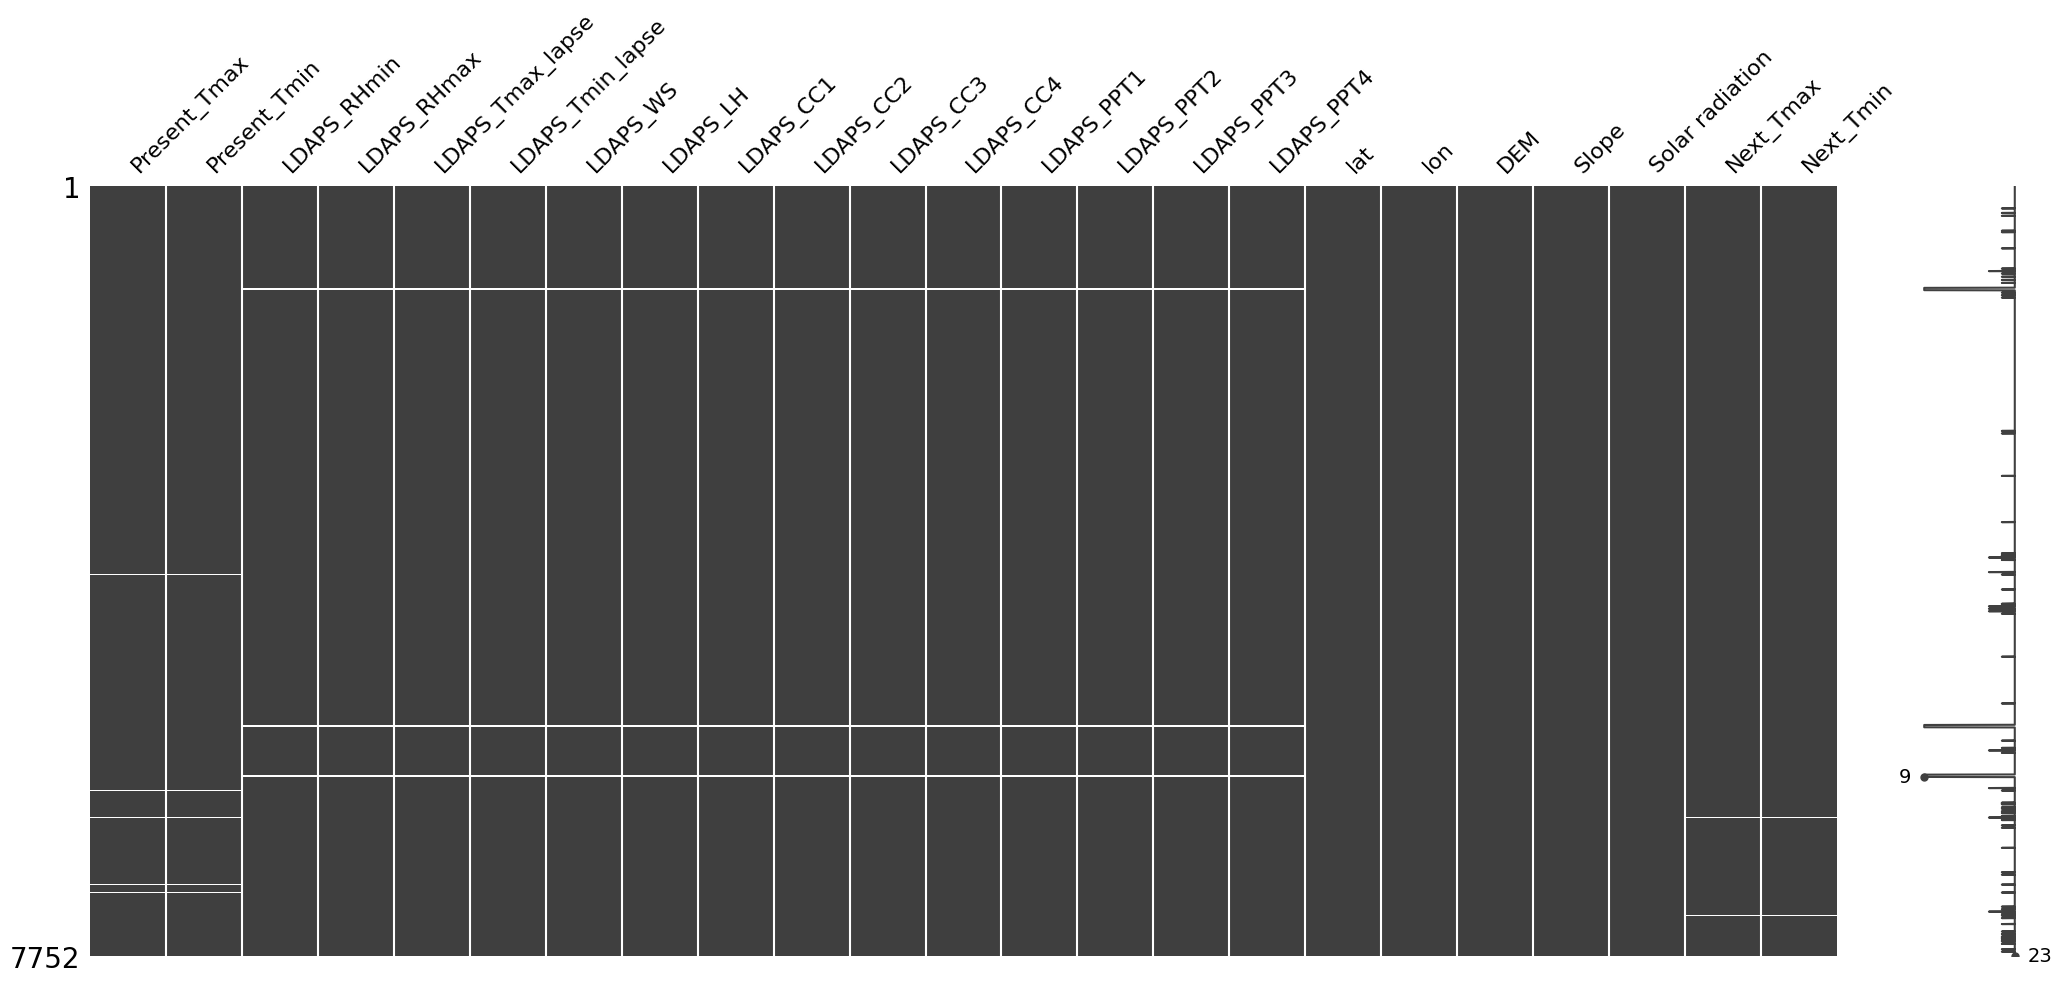

In [5]:
# Visualizing missing data
import missingno as msno
msno.matrix(df)

In [6]:
# Creating an imputer object with k=5 to fill missing values using the mean of 5 nearest neighbors
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [7]:
# Converting the NumPy Array Back to DataFrame
df = pd.DataFrame(df, columns = df.columns)

<Axes: >

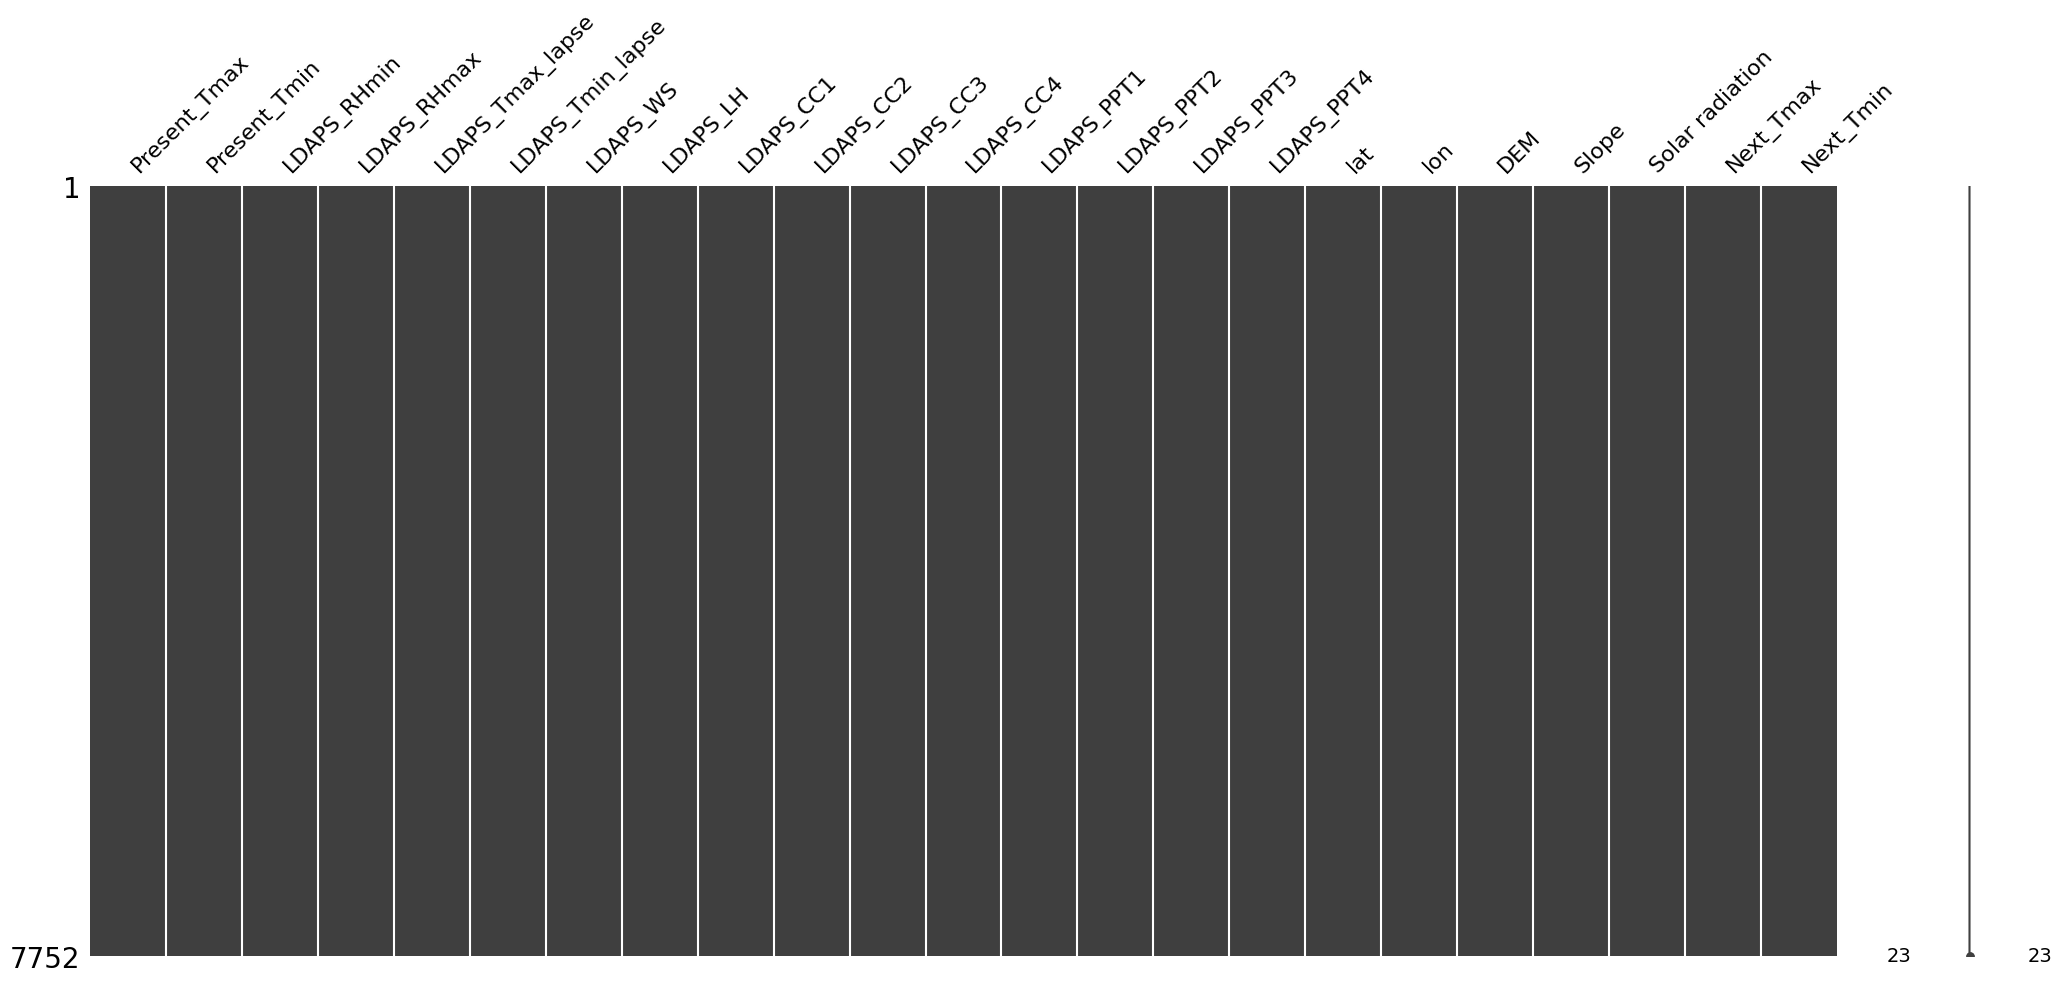

In [8]:
#Visulaizing after handling the missing data
msno.matrix(df)

# Exploratory Data Analysis (EDA)

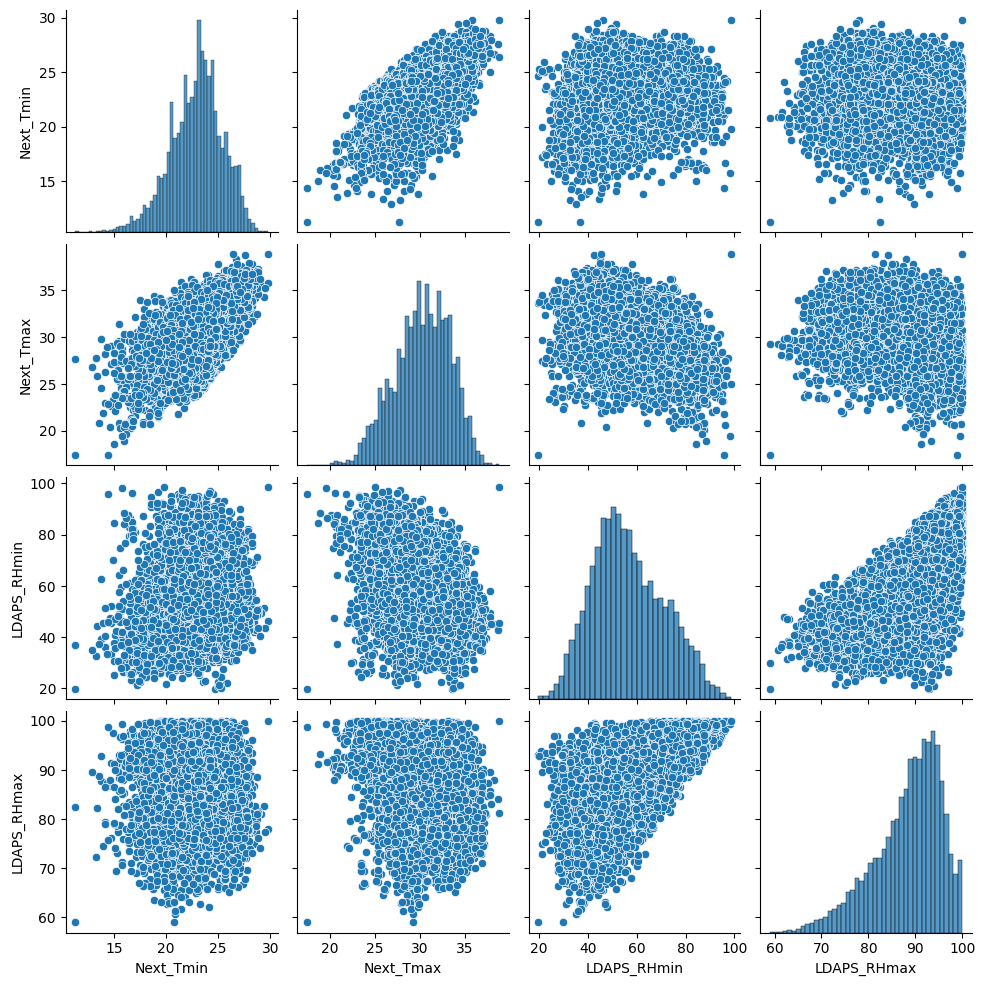

In [9]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

# Creating a pairplot of selected features to visualize relationships and distributions
sns.pairplot(df[['Next_Tmin', 'Next_Tmax', 'LDAPS_RHmin', 'LDAPS_RHmax']])

plt.show()

# This pairplot helps in visualizing the most important features to understand their distributions and inter-relationships

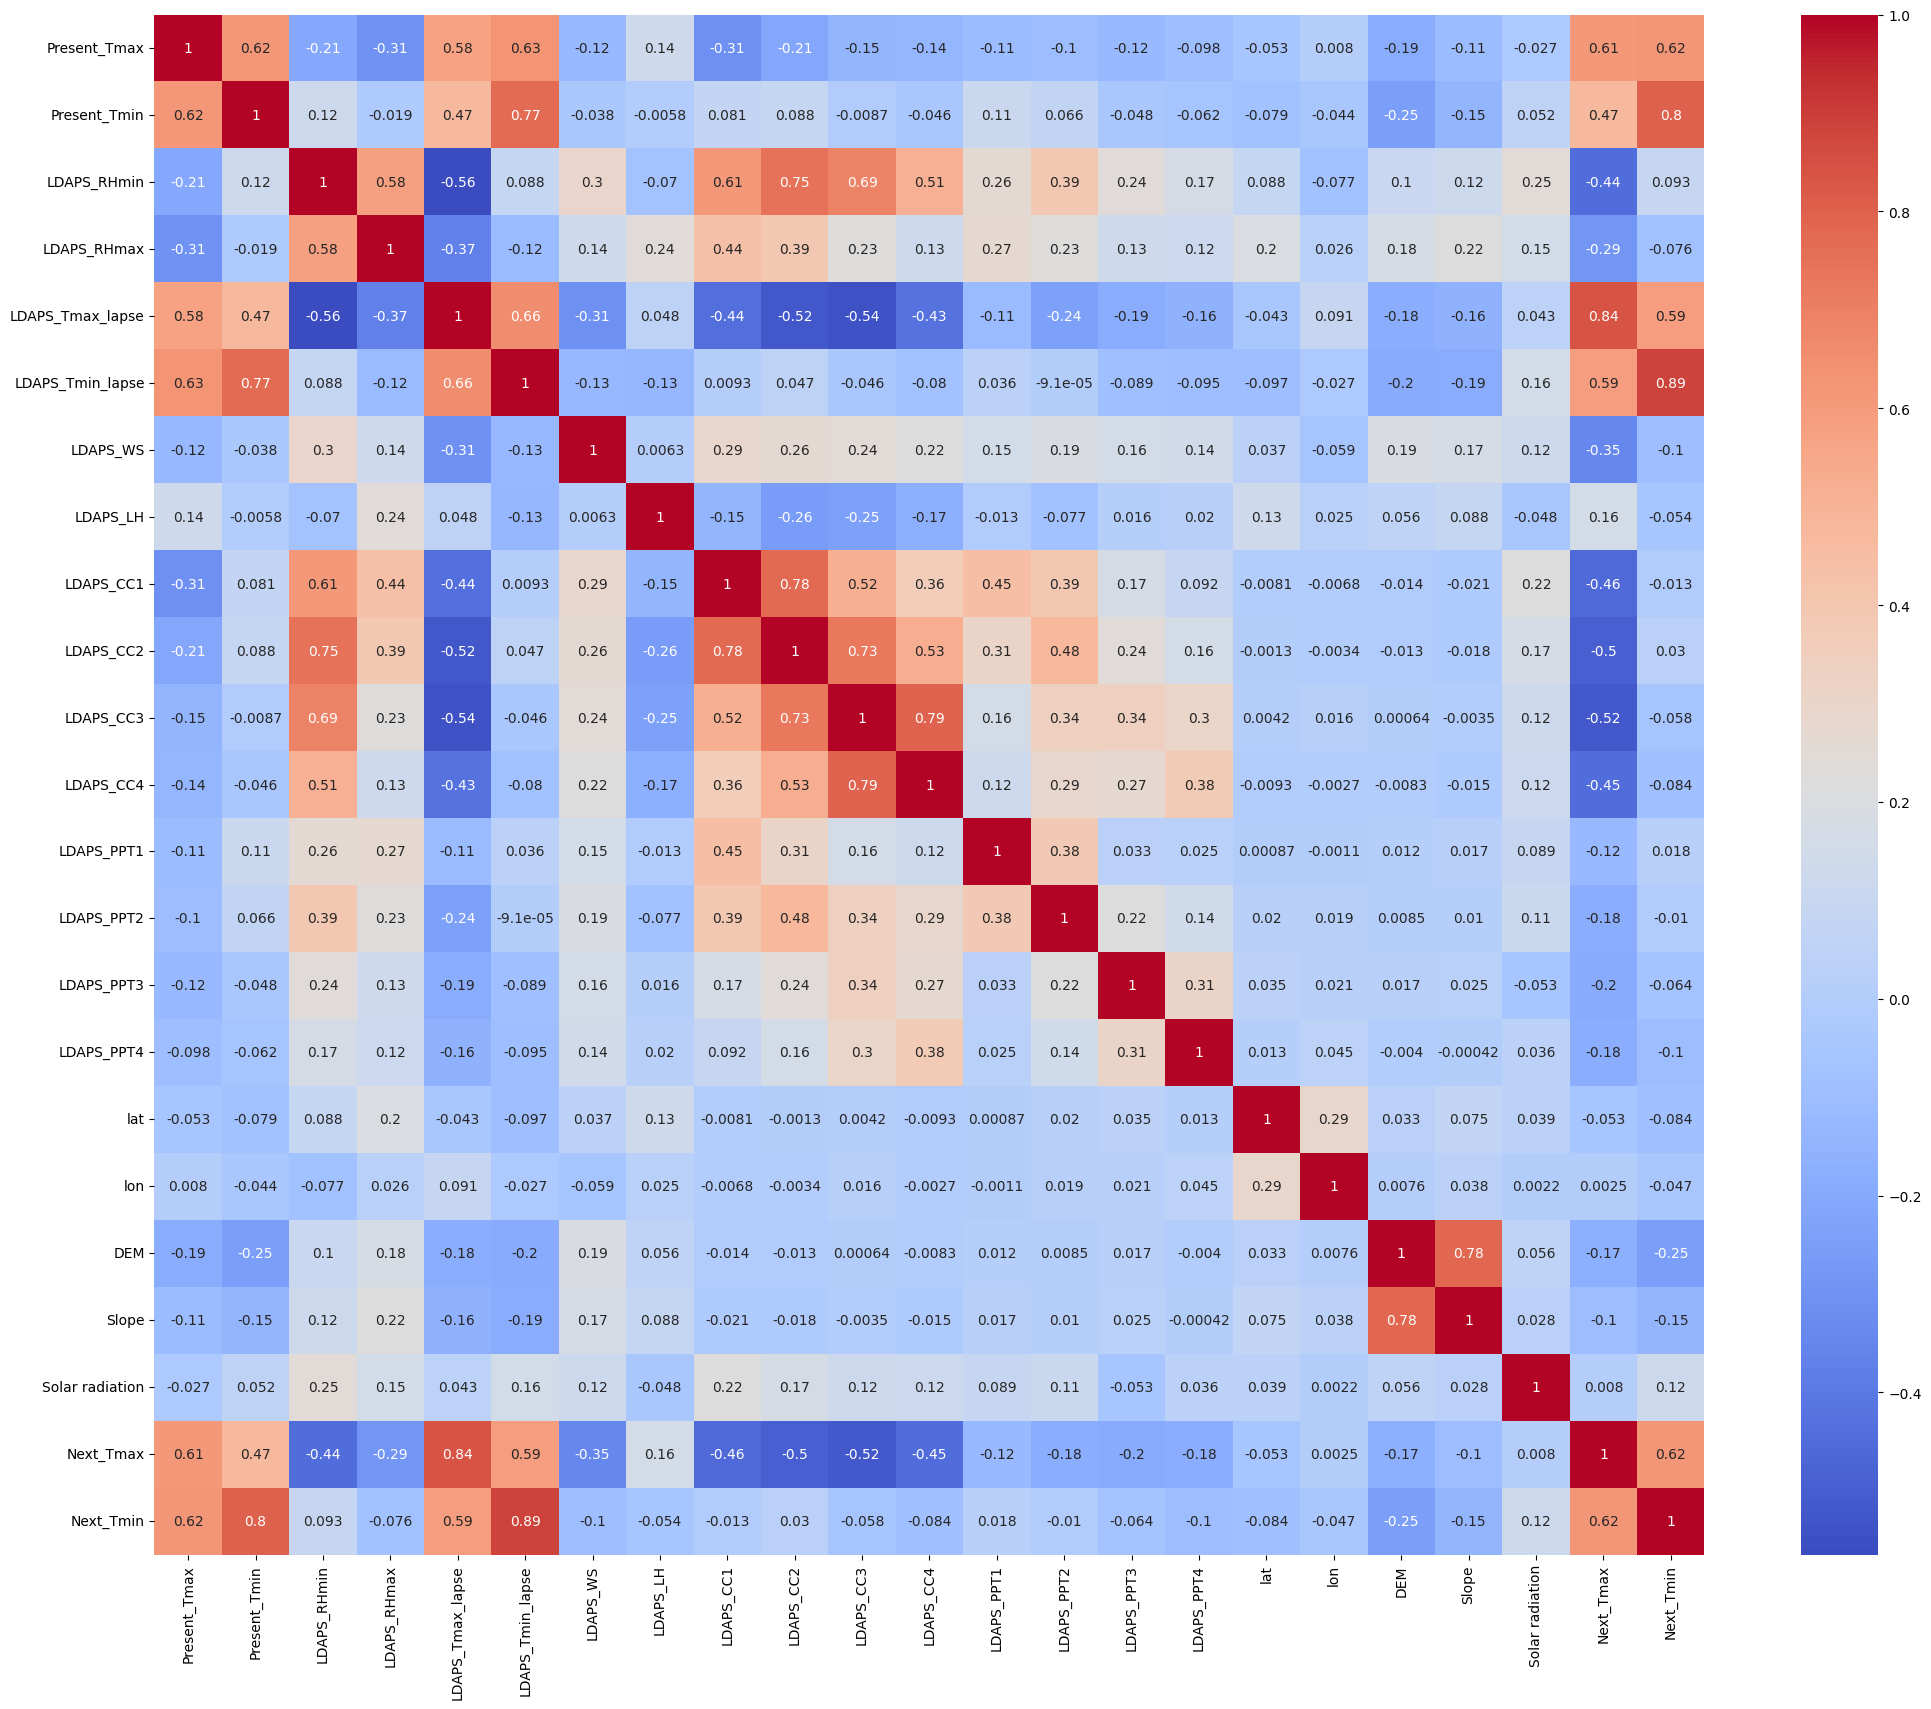

In [10]:
# Correlation heatmap
plt.figure(figsize=(25, 20))

# Generating a heatmap to visualize the correlation matrix of the DataFrame.
# 'annot=True' displays the correlation coefficients in the heatmap.
# 'cmap='coolwarm'' uses a color map to highlight different levels of correlations.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

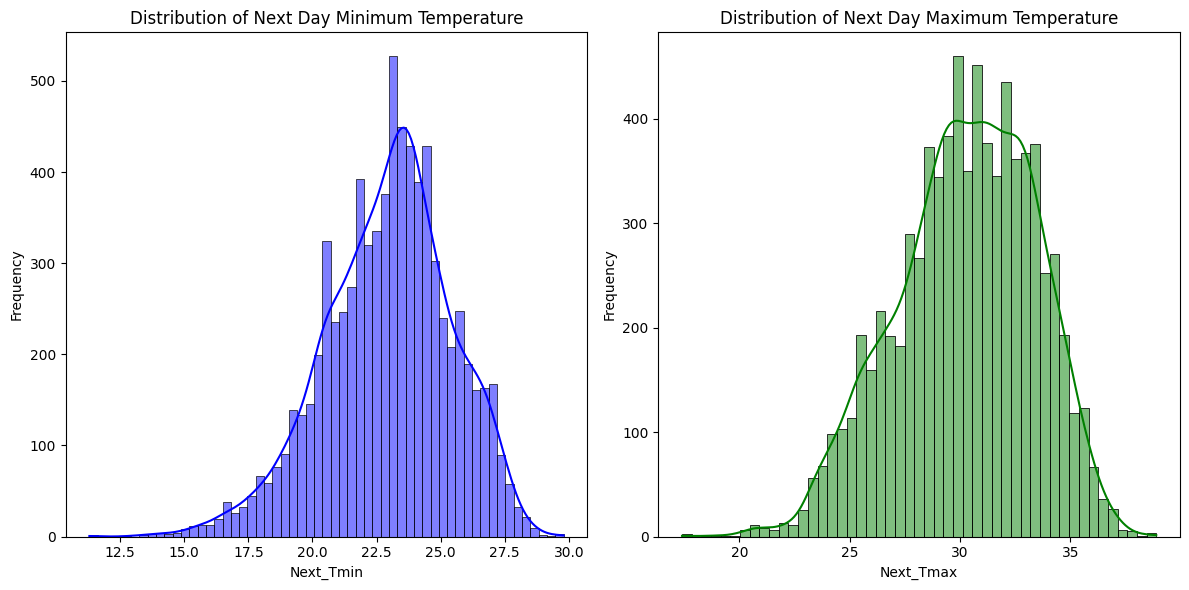

In [11]:
# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Plot for 'Next_Tmin'
plt.subplot(1, 2, 1)  # 1 rows, 1 column, 1st subplot
sns.histplot(df['Next_Tmin'], kde=True, color='blue')
plt.title('Distribution of Next Day Minimum Temperature')
plt.xlabel('Next_Tmin')
plt.ylabel('Frequency')

# Plot for 'Next_Tmax'
plt.subplot(1, 2, 2)  # 1 rows, 2 column, 2nd subplot
sns.histplot(df['Next_Tmax'], kde=True, color='green')
plt.title('Distribution of Next Day Maximum Temperature')
plt.xlabel('Next_Tmax')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

Next Day Minimum Temperature Insight: The distribution of next day's minimum temperatures is mostly normal but slightly right-skewed. Typical nights are around 22.5°C, with some cooler at 12.5°C and others warmer near 30.0°C. This skew suggests that while warmer nights are uncommon, they do occur.

Next Day Maximum Temperature Insight: Maximum temperatures also follow a roughly normal distribution but with a slight left skew, primarily ranging from 20°C to 35°C and centering around 28-29°C. This indicates that cooler days are less frequent.

Overall Insights: Both temperature distributions are relatively normal but with minor skews. This predictability is advantageous for modeling. Nonetheless, the occasional skews and outliers indicate a need for robust or adaptive modeling approaches to accommodate rare temperature extremes effectively.

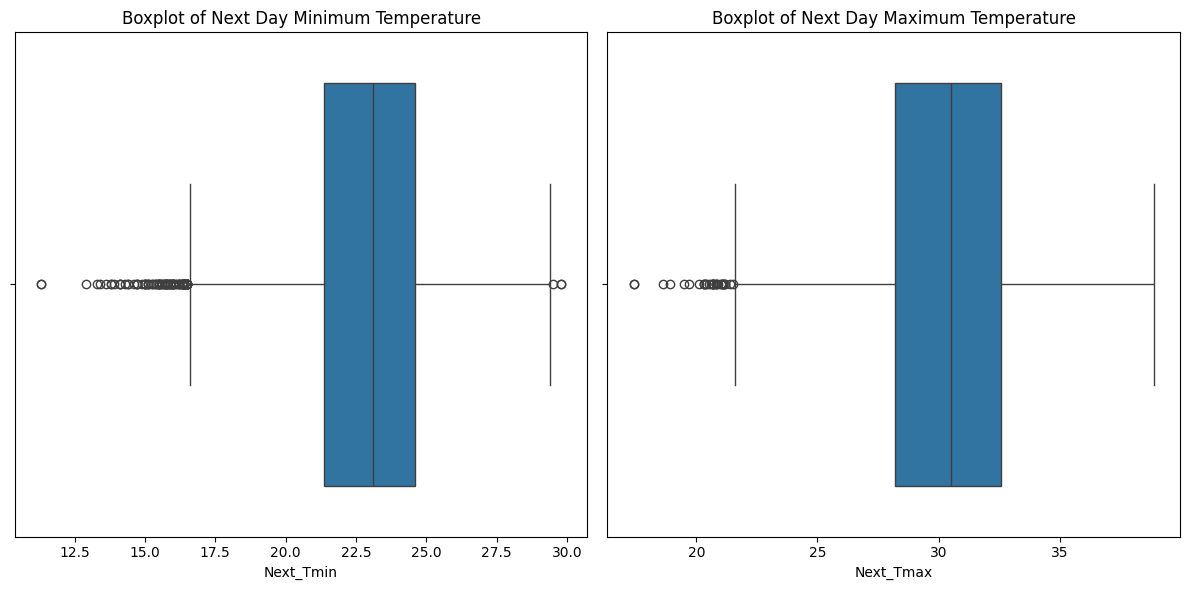

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure with specified size and two subplots
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate two plots side by side

# Plotting the boxplot for Next Day Minimum Temperature
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=df['Next_Tmin'])
plt.title('Boxplot of Next Day Minimum Temperature')

# Plotting the boxplot for Next Day Maximum Temperature
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['Next_Tmax'])
plt.title('Boxplot of Next Day Maximum Temperature')

plt.tight_layout()  # Adjust subplots to fit into the figure area neatly
plt.show()


**Box Plot Next Day Minimum Temperature Insights**

Central Tendency and Spread: Checking out the boxplot, I see the median temperature hovers around 22.5°C. Most days fall between 17.5°C and 27.5°C, showing a moderate range of night temperatures.

Outliers and Skewness: There's a noticeable bunch of outliers dropping below 15°C. It looks like these represent a left skew, suggesting those unexpectedly cool nights are more common than the random warmer outliers.

Modeling Insights: The presence of these chilly outliers is something to watch. They could throw off models aimed at predicting typical temperature ranges. It might be wise to tweak the model or apply a transformation to ensure it captures these cooler extremes accurately.



**Box Plot Next Day Maximum Temperature Insights**

Central Tendency and Spread: The boxplot for maximum temperatures places the median around 28°C, with most temperatures stretching from about 25°C to 32°C.

Outliers and Skewness: I've spotted a few outliers, especially those soaring above 35°C and dipping below 20°C. These extremes break from the usual pattern and could challenge typical predictions.

Modeling Implications: Given these extremes, adopting robust modeling techniques or making adjustments for outliers seems crucial. This way, we can ensure our predictions remain reliable even when the temperature swings outside the expected range.

In [13]:
from scipy.stats import skew
from scipy import stats

# Calculating skewness
skew_tmin = skew(df['Next_Tmin'])
skew_tmax = skew(df['Next_Tmax'])
print(f"Skewness of Next Tmin: {skew_tmin}")
print(f"Skewness of Next Tmax: {skew_tmax}")

Skewness of Next Tmin: -0.40593014609842587
Skewness of Next Tmax: -0.33946072330021815


In [14]:
# Removing outliers based on IQR
Q1 = df['Next_Tmin'].quantile(0.25)
Q3 = df['Next_Tmin'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Next_Tmin'] >= (Q1 - 1.5 * IQR)) & (df['Next_Tmin'] <= (Q3 + 1.5 * IQR))]

Q1 = df['Next_Tmax'].quantile(0.25)
Q3 = df['Next_Tmax'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Next_Tmax'] >= (Q1 - 1.5 * IQR)) & (df['Next_Tmax'] <= (Q3 + 1.5 * IQR))]

In [15]:
# Calculating skewness after removing outliers
skew_tmin = skew(df['Next_Tmin'])
skew_tmax = skew(df['Next_Tmax'])
print(f"Skewness of Next Tmin: {skew_tmin}")
print(f"Skewness of Next Tmax: {skew_tmax}")

Skewness of Next Tmin: -0.17656414356626002
Skewness of Next Tmax: -0.2482071623083754


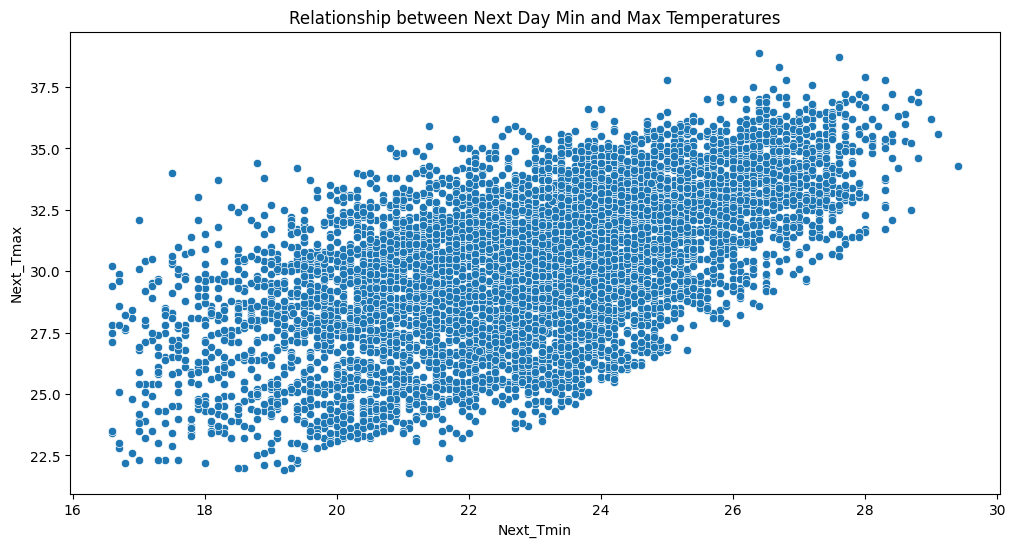

In [16]:
# Bivariate Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Next_Tmin', y='Next_Tmax', data=df)
plt.title('Relationship between Next Day Min and Max Temperatures')
plt.show()

Overview: Looking at the scatter plot, there's a clear positive link between the next day's minimum (Next_Tmin) and maximum (Next_Tmax) temperatures. Essentially, when the night is warmer, the following day tends to be warmer too.

Data Distribution: The points on the plot are closely clustered and follow a linear upward trend, which really highlights a strong linear relationship. I noticed that the spread of maximum temperatures gets a bit wider as the minimum temperatures increase, showing that there's more variability in how hot the days can get when the nights are warmer.

Interpretation: Understanding this connection between minimum and maximum temperatures is key for getting a handle on daily temperature patterns. This strong correlation is especially useful in predictive modeling for weather forecasts, as it suggests that knowing one temperature can help accurately predict the other.

## Data Preparation

In [17]:
from sklearn.model_selection import train_test_split

# Preparing the features and target
X = df.drop(['Next_Tmin', 'Next_Tmax'], axis=1)
y_tmin = df['Next_Tmin']
y_tmax = df['Next_Tmax']

# Splitting the data
X_train_tmin, X_test_tmin, y_train_tmin, y_test_tmin = train_test_split(X, y_tmin, test_size=0.2, random_state=42)
X_train_tmax, X_test_tmax, y_train_tmax, y_test_tmax = train_test_split(X, y_tmax, test_size=0.2, random_state=42)

# Evaluating Baseline Model Performance

In [18]:
#importing necessary packages

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [19]:
#Assigning the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()
}

In [20]:
def evaluate_baseline_models(models, X_train, X_test, y_train, y_test):
    """
    Evaluate each model using cross-validation and calculate various metrics for each.

    Args:
    models (dict): A dictionary containing the models to evaluate.
    X (DataFrame): Input features.
    y (Series): Target variable.

    Returns:
    DataFrame: A DataFrame containing the MSE and R² scores for each model.
    """

    for name, model in models.items():
        print(f"Evaluating {name}")
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)

        results = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
            'Explained Variance': explained_variance
        }

        print(f"{name}: {results}")

In [21]:
# Evaluate models for T_MIN
print('Base Results for T_MIN')
tmin_base_results = evaluate_baseline_models(models, X_train_tmin, X_test_tmin, y_train_tmin, y_test_tmin)

# Evaluate models for T_MAX
print('\nBase Results for T_MAX')
tmax_base_results = evaluate_baseline_models(models, X_train_tmax, X_test_tmax, y_train_tmax, y_test_tmax)

Base Results for T_MIN
Evaluating Linear Regression
Linear Regression: {'MSE': 0.9597485126532349, 'MAE': 0.7730693779143591, 'R2': 0.8286397451467373, 'Explained Variance': 0.8286419866685033}
Evaluating Random Forest
Random Forest: {'MSE': 0.5938411796335081, 'MAE': 0.5853997382198953, 'R2': 0.8939714159045256, 'Explained Variance': 0.8939733316985526}
Evaluating Gradient Boosting
Gradient Boosting: {'MSE': 0.6948797232901119, 'MAE': 0.6586310385837909, 'R2': 0.8759312831377307, 'Explained Variance': 0.8759313931903077}
Evaluating KNN
KNN: {'MSE': 2.669872387434555, 'MAE': 1.2949293193717277, 'R2': 0.5233021914546313, 'Explained Variance': 0.5242421709271177}
Evaluating SVR
SVR: {'MSE': 4.872440272397244, 'MAE': 1.763105326843491, 'R2': 0.13004021800764787, 'Explained Variance': 0.13267523188501562}

Base Results for T_MAX
Evaluating Linear Regression
Linear Regression: {'MSE': 2.13957889942405, 'MAE': 1.1048838151637417, 'R2': 0.7592548184978138, 'Explained Variance': 0.759262600992

# Creating Pipeline With Feature Selection

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Defining Pipeline for preprocessing, feature selection, and PCA
def create_pipeline(model):
    return Pipeline([
        ('preprocessor', Pipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(score_func=f_regression, k=8)),
            ('pca', PCA(n_components=0.95))
        ])),
        ('regressor', model)
    ])

# Model Building with Hyperparameter tuning and Evaluation

In [23]:
import numpy as np
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

def evaluate_model(X_train, y_train, X_test, y_test, model, param_grid=None):
    pipeline = create_pipeline(model)
    results = {}
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate different scores
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)

    # Store results
    results['MSE'] = mse
    results['MAE'] = mae
    results['R2'] = r2
    results['Explained Variance'] = explained_variance

    if param_grid:
        results['Best Params'] = grid_search.best_params_

    return best_model, results

In [24]:
def run_model_evaluation(X_train, X_test, y_train, y_test, model_dict, param_grids):
    """
    Evaluates a dictionary of models on provided training and testing data, handling parameter grids if provided.
    """
    best_models = {}
    model_results = {}

    # Loop through each model provided in the dictionary.
    for name, model in model_dict.items():
        # Evaluate the model with hyperparameter tuning.
        if name in param_grids:
            best_model, results = evaluate_model(X_train, y_train, X_test, y_test, model, param_grids[name])
        # Evaluate the model without hyperparameter tuning.
        else:
            best_model, results = evaluate_model(X_train, y_train, X_test, y_test, model)

        # Storing the best model and its results in the respective dictionaries.
        best_models[name] = best_model
        model_results[name] = results
        print(f"{name}: {results}")

    # Return the dictionaries containing the best models and their metrics.
    return best_models, model_results

In [25]:
# Parameter grids for models that benefit from tuning
param_grid = {
    'Ridge Regression': {'regressor__alpha': [0.1, 1.0, 10.0]},
    'Random Forest': {'regressor__n_estimators': [100, 200], 'regressor__max_depth': [10, 20]},
    'Gradient Boosting': {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.01, 0.1]},
    'Decision Tree': {'regressor__max_depth': [None, 10, 20]},
    'KNN': {'regressor__n_neighbors': [3, 5, 7]},
    'SVR': {'regressor__C': [0.1, 1, 10], 'regressor__gamma': ['scale', 'auto']}
}

In [26]:
# Running model evaluation for T_min
print('Results for T_MIN')
best_models_tmin, tmin_results = run_model_evaluation(X_train_tmin, X_test_tmin, y_train_tmin, y_test_tmin, models, param_grid)

# Running model evaluation for T_max
print('\nResults for T_MAX')
best_models_tmax, tmax_results = run_model_evaluation(X_train_tmax, X_test_tmax, y_train_tmax, y_test_tmax, models, param_grid)

Results for T_MIN
Linear Regression: {'MSE': 1.156145146870444, 'MAE': 0.8527920023702481, 'R2': 0.7935737076920446, 'Explained Variance': 0.793594971793182}
Random Forest: {'MSE': 0.9864909388669405, 'MAE': 0.7673074462749211, 'R2': 0.8238649641380056, 'Explained Variance': 0.823923603733155, 'Best Params': {'regressor__max_depth': 20, 'regressor__n_estimators': 200}}
Gradient Boosting: {'MSE': 1.0170516287662257, 'MAE': 0.7901817368240248, 'R2': 0.8184084434551492, 'Explained Variance': 0.8184325482611011, 'Best Params': {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}}
KNN: {'MSE': 0.9556984079495673, 'MAE': 0.7526103216155573, 'R2': 0.8293628793480963, 'Explained Variance': 0.8294322564059342, 'Best Params': {'regressor__n_neighbors': 7}}
SVR: {'MSE': 0.9120878197910203, 'MAE': 0.7249225172850072, 'R2': 0.8371494207207832, 'Explained Variance': 0.8379264947139812, 'Best Params': {'regressor__C': 10, 'regressor__gamma': 'auto'}}

Results for T_MAX
Linear Regression:

# Learning Curve and Plotting

In [27]:
def plot_learning_curve(model, X, y, ax, title):

     # Fetching learning curve data with a 5-fold cross-validation setup.
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error')
    # Calculating the mean of training scores, converting from negative MSE for easier interpretation.
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    # Plotting the training scores on the provided axes object, marking data points in red.
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    # Plotting the cross-validation scores in green to distinguish from training scores.
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_title(title)
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('MSE')
    ax.legend(loc="best")
    ax.grid(True)

In [28]:
def plot_all_learning_curves(models, X_train, y_train):
    """
    Plots learning curves for each model in the models dictionary.
    This function is useful for visually comparing how different models learn from the same training data.

    Args:
    models (dict): A dictionary containing model names and their respective estimators.
    X_train (DataFrame): The input features for training.
    y_train (Series): The target variable for training.
    """
    # Creating a subplot for each model in the dictionary; setting figure size dynamically based on the number of models.
    fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(10, 5 * len(models)))

    # If there's only one model, wrap the axes object in a list to make iteration consistent.
    if len(models) == 1:  # Adjust axes object if there's only one model
        axes = [axes]

    # Looping through each model and its corresponding axis in the subplot.
    for ax, (name, model) in zip(axes, models.items()):
        # Utilizing the previously defined function to plot the learning curve of each model on its respective axis.
        plot_learning_curve(model, X_train, y_train, ax, f'Learning Curve for {name}')

    plt.tight_layout()

    plt.show()


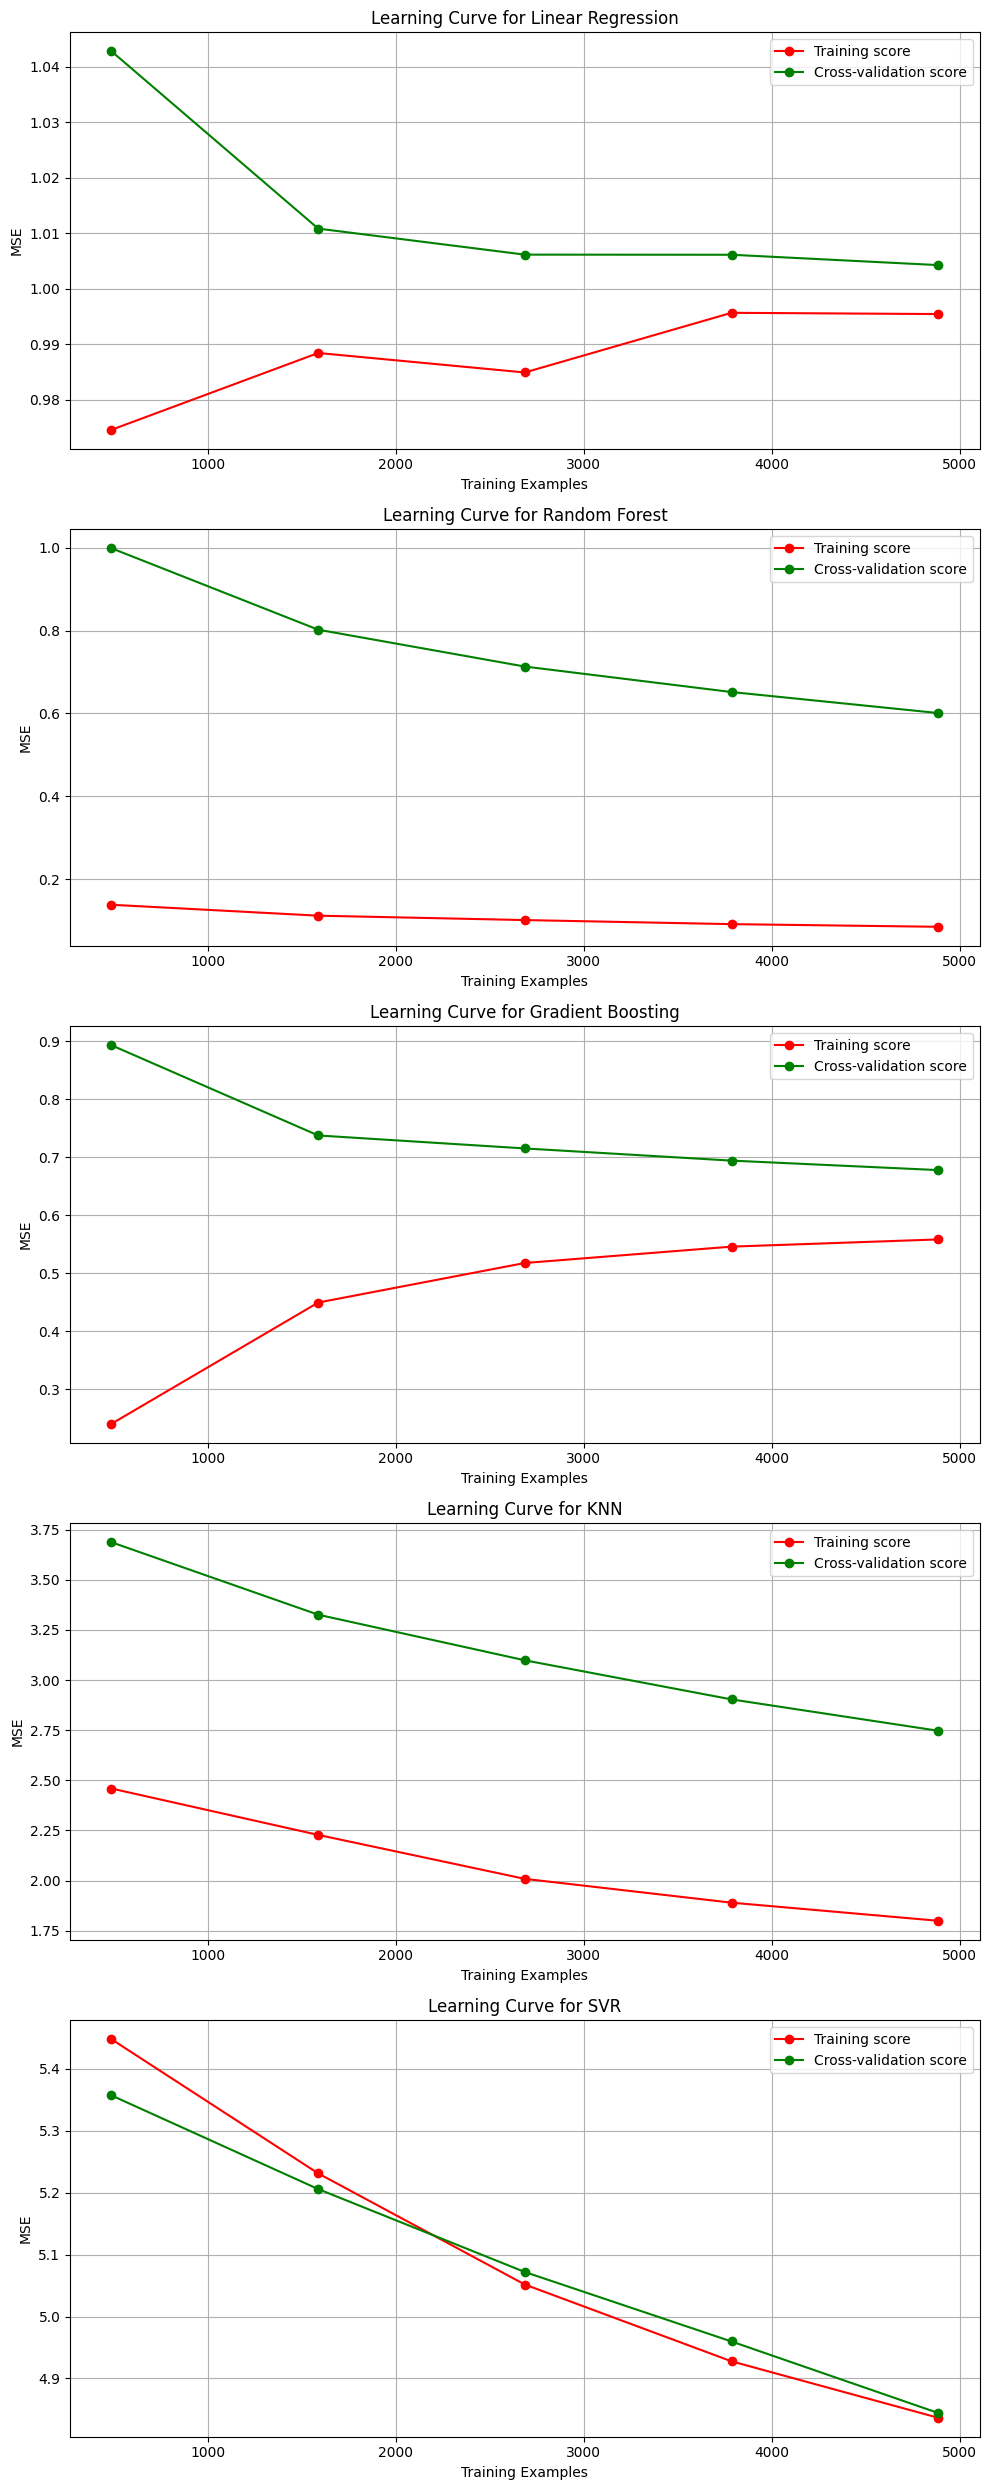

In [29]:
plot_all_learning_curves(models, X_train_tmin, y_train_tmin)

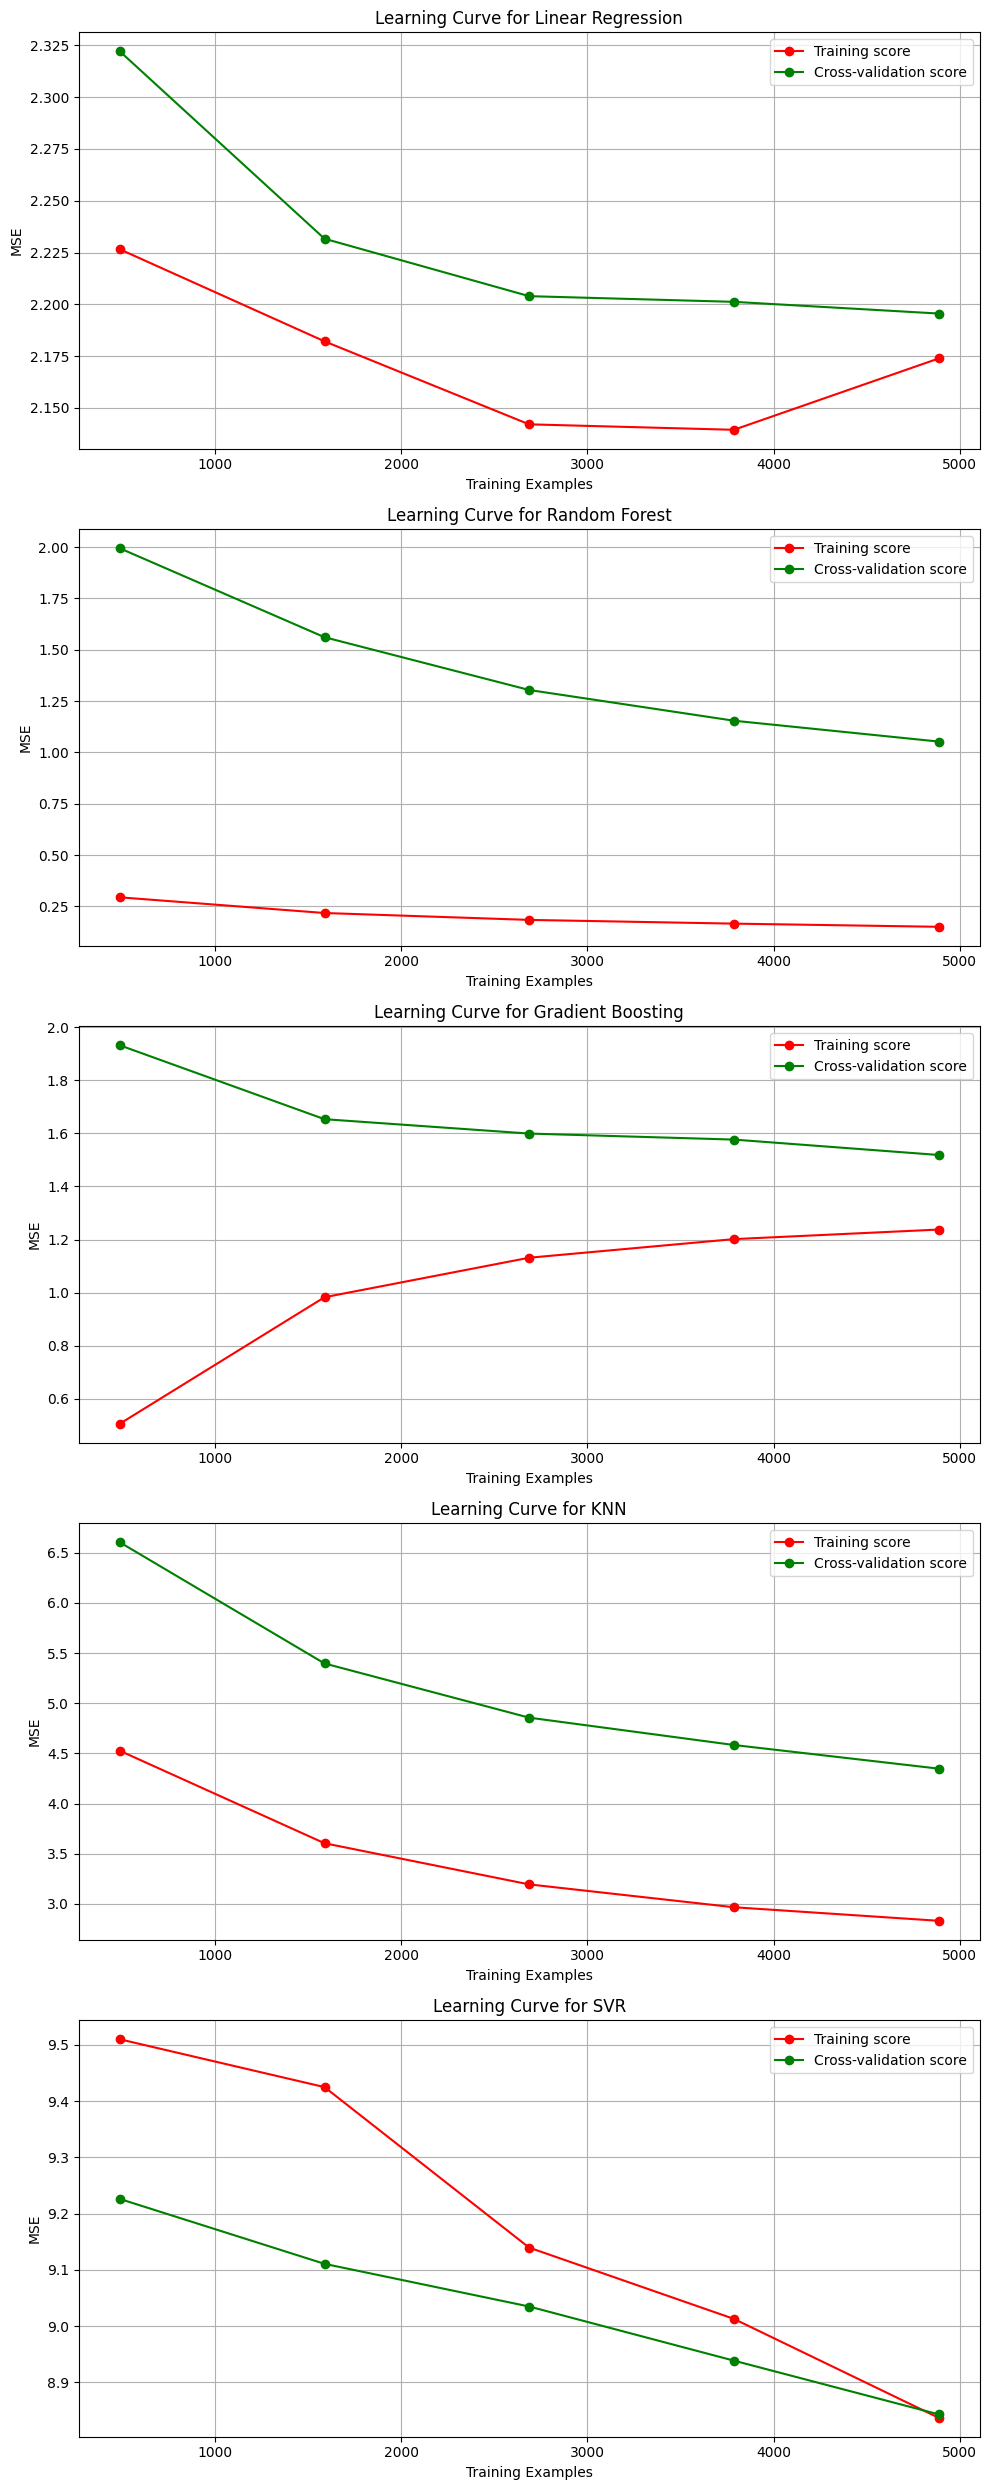

In [30]:
plot_all_learning_curves(models, X_train_tmax, y_train_tmax)

# Emsemble

In [31]:
from sklearn.ensemble import VotingRegressor

In [32]:
def run_ensemble_model_evaluation(X_train, X_test, y_train, y_test, best_models):
    model_results = {}

    # Creating the ensemble model
    ensemble_estimators = [(name, model) for name, model in best_models.items()]
    voting_regressor = VotingRegressor(estimators=ensemble_estimators, n_jobs=-1)
    voting_regressor.fit(X_train, y_train)
    y_pred_ensemble = voting_regressor.predict(X_test)

    # Calculating metrics
    mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
    mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
    r2_ensemble = r2_score(y_test, y_pred_ensemble)
    explained_variance_ensemble = explained_variance_score(y_test, y_pred_ensemble)

    # Storing results and predictions
    model_results['Voting Ensemble'] = {
        'MSE': mse_ensemble,
        'MAE': mae_ensemble,
        'R2': r2_ensemble,
        'Explained Variance': explained_variance_ensemble,
        'Predictions': y_pred_ensemble
    }
    best_models['Voting Ensemble'] = voting_regressor

     # Printing results
    print("Voting Ensemble Results:")
    print(f"MSE: {mse_ensemble}")
    print(f"MAE: {mae_ensemble}")
    print(f"R2 Score: {r2_ensemble}")
    print(f"Explained Variance: {explained_variance_ensemble}")

    return best_models, model_results, y_pred_ensemble


In [33]:
print('Ensemble Results for T_MIN')
best_models_tmin, tmin_ensemble_results, y_pred_ensemble_tmin = run_ensemble_model_evaluation(X_train_tmin, X_test_tmin, y_train_tmin, y_test_tmin, best_models_tmin)

print('\n Ensemble Results for T_MAX')
best_models_tmax, tmax_ensemble_results, y_pred_ensemble_tmax = run_ensemble_model_evaluation(X_train_tmax, X_test_tmax, y_train_tmax, y_test_tmax, best_models_tmax)

Ensemble Results for T_MIN
Voting Ensemble Results:
MSE: 0.9084228705165082
MAE: 0.7386760542153266
R2 Score: 0.8378037865608183
Explained Variance: 0.8378180498661896

 Ensemble Results for T_MAX
Voting Ensemble Results:
MSE: 1.3400355756714009
MAE: 0.8887704224278813
R2 Score: 0.8492193449976349
Explained Variance: 0.8492307950313578


# Comparing the Metrics

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_metrics(model_results):
    """
    Plots a comparison of MSE, MAE, R^2, and Explained Variance for each model.

    Args:
    model_results (dict): Dictionary containing performance metrics for each model.
    """
    n = len(model_results)
    r = np.arange(n)
    width = 0.2

    # Prepare data
    mse = [result['MSE'] for result in model_results.values()]
    mae = [result['MAE'] for result in model_results.values()]
    r2 = [result['R2'] for result in model_results.values()]
    exp_var = [result['Explained Variance'] for result in model_results.values()]
    labels = list(model_results.keys())

    # Create plots
    fig, ax = plt.subplots(figsize=(14, 8))

    # Line plot with markers for MSE
    ax.plot(r, mse, color='b', marker='o', linestyle='-', linewidth=2, markersize=8, label='MSE')
    # Line plot with markers for MAE
    ax.plot(r + width, mae, color='g', marker='s', linestyle='-', linewidth=2, markersize=8, label='MAE')
    # Line plot with markers for R2
    ax.plot(r + 2 * width, r2, color='r', marker='^', linestyle='-', linewidth=2, markersize=8, label='R2')
    # Line plot with markers for Explained Variance
    ax.plot(r + 3 * width, exp_var, color='c', marker='d', linestyle='-', linewidth=2, markersize=8, label='Explained Variance')


    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_xlabel('Models', fontsize=15)
    ax.set_ylabel('Scores', fontsize=15)
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(r + 1.5 * width)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

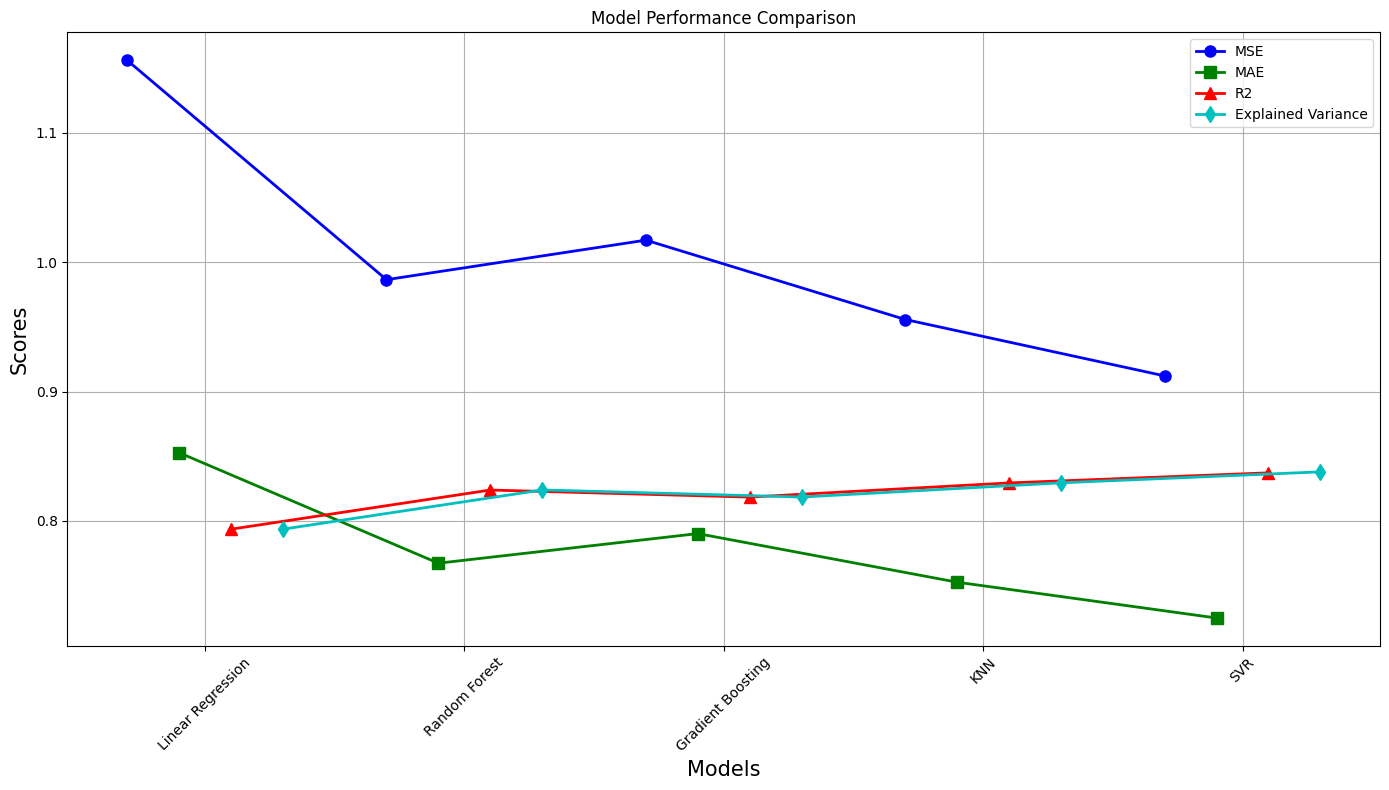

In [35]:
plot_model_metrics(tmin_results)

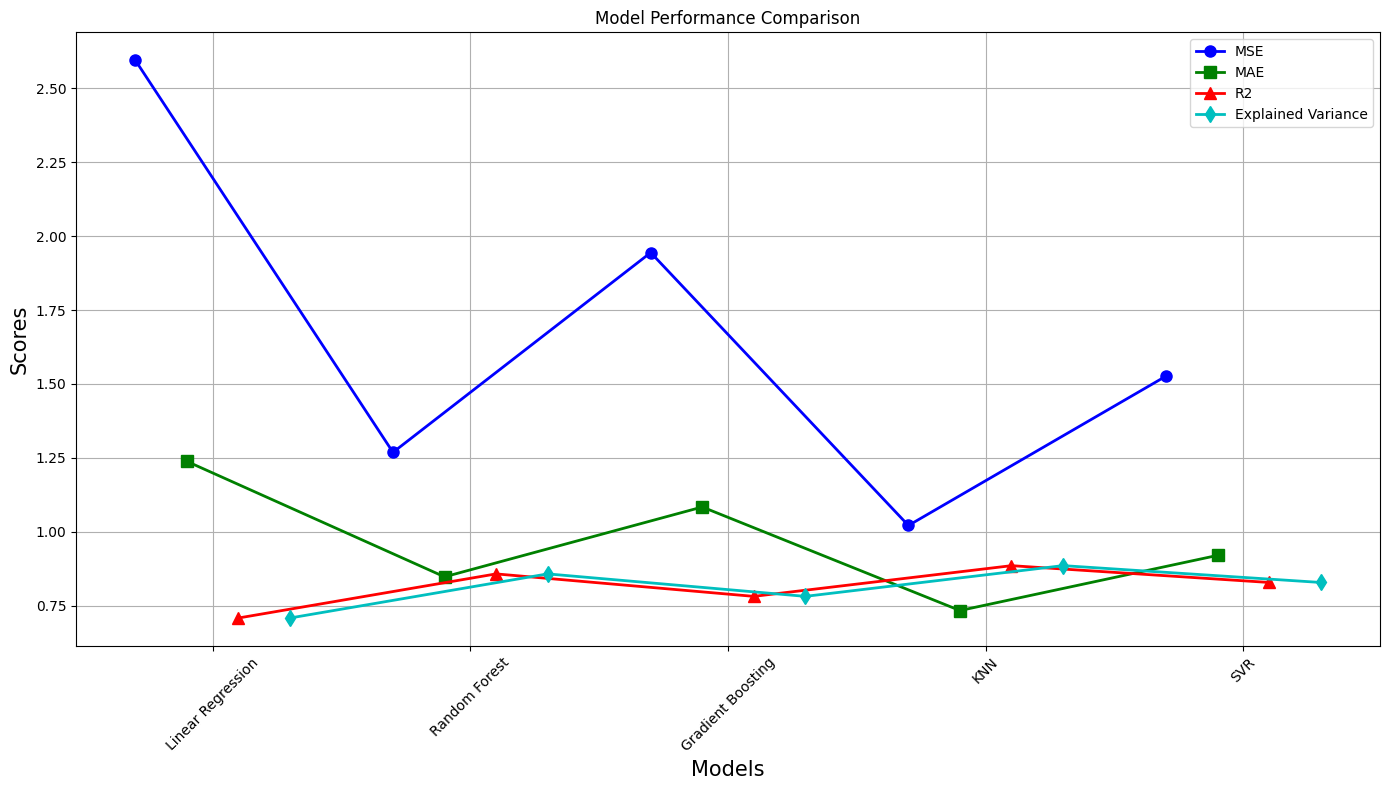

In [36]:
plot_model_metrics(tmax_results)

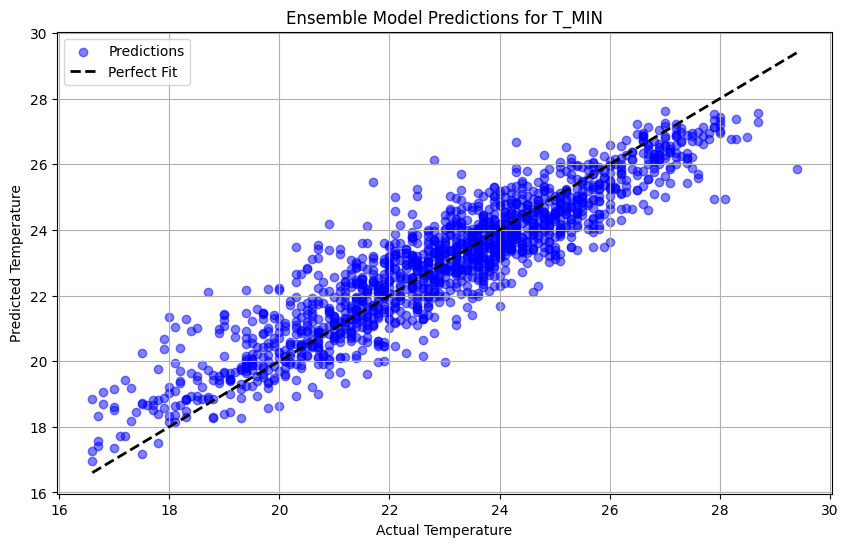

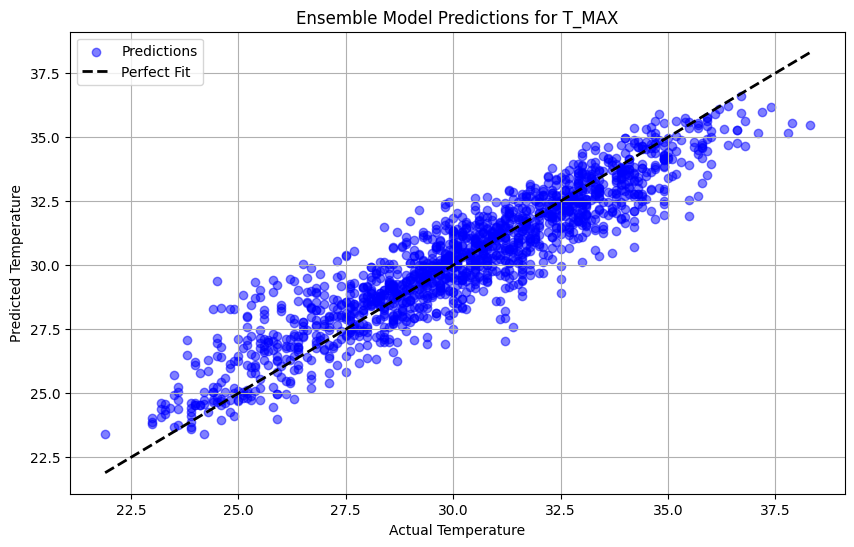

In [37]:
import matplotlib.pyplot as plt

# defining the function to plot the graphs
def plot_ensemble_results(y_test, y_pred_ensemble, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_ensemble, alpha=0.5, color='blue', label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

#plotting the graphs
plot_ensemble_results(y_test_tmin, y_pred_ensemble_tmin, 'Ensemble Model Predictions for T_MIN')
plot_ensemble_results(y_test_tmax, y_pred_ensemble_tmax, 'Ensemble Model Predictions for T_MAX')